In [1]:
#%load_ext autotime
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("train.csv", date_parser=True, encoding="utf-8")
test_data = pd.read_csv("test.csv", date_parser=True, encoding="utf-8")
print(train_data.shape)
print(test_data.shape)
#print(train_data.head())
#print(test_data.head())
print(train_data.columns)

(1460, 81)
(1459, 80)
Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
 

In [3]:
f = open('headers.txt', 'w')
for item in train_data.columns:
        f.write(item+"\n")

In [4]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

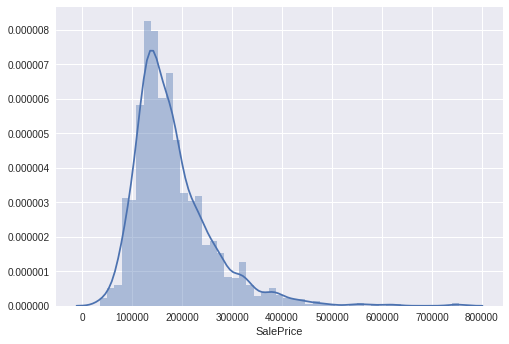

In [5]:
sns.distplot(train_data['SalePrice'])

we can see that the values of the price column is __Positive Skewed/ Right Skewed__ and that the __Mode__ aka(majority of house prices) of the data ~ 150,000$

In [6]:
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Relationship with numerica variables

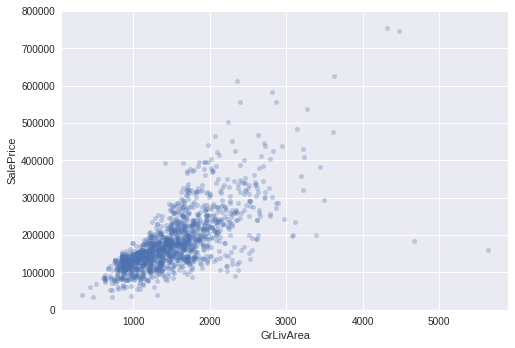

In [7]:
var = 'GrLivArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), alpha=0.3);

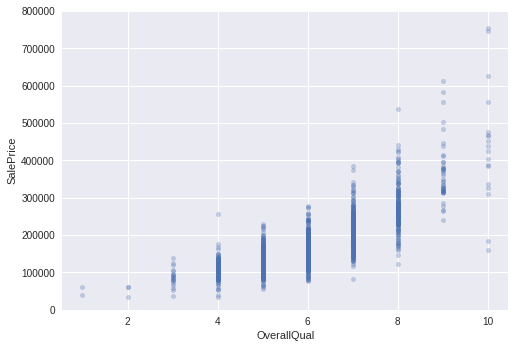

In [8]:
var = 'OverallQual'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), alpha=0.3);

(-0.5, 9.5, 0, 800000)

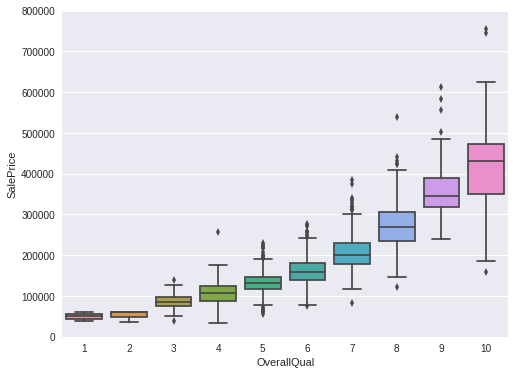

In [9]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

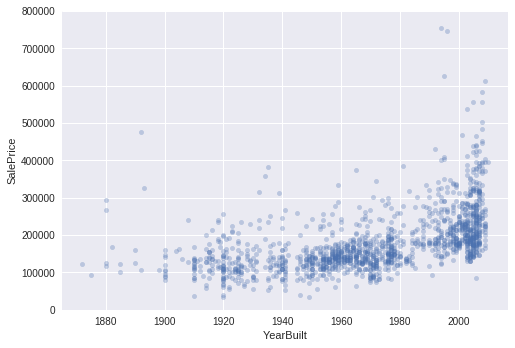

In [10]:
var = 'YearBuilt'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), alpha=0.3);

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

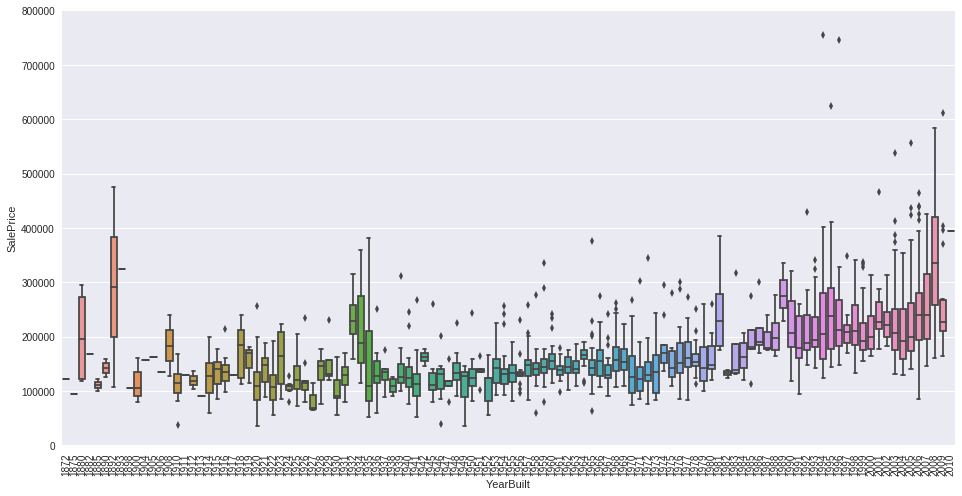

In [11]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

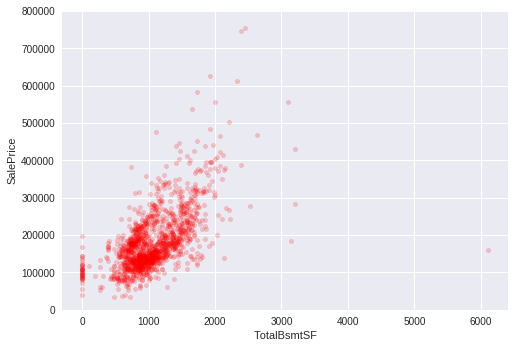

In [12]:
var = 'TotalBsmtSF'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), alpha=0.2, c='r');

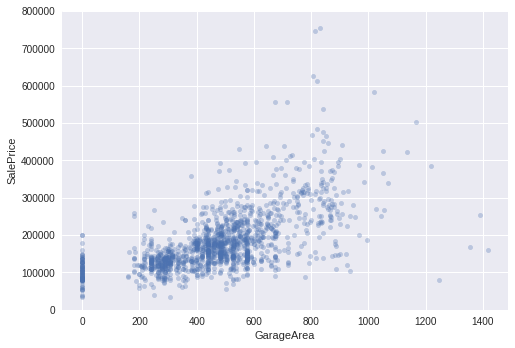

In [13]:
var = 'GarageArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), alpha=0.3);

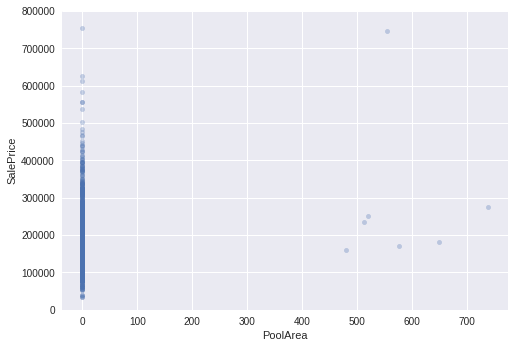

In [14]:
var = 'PoolArea' # most of records has value of 0
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), alpha=0.3);

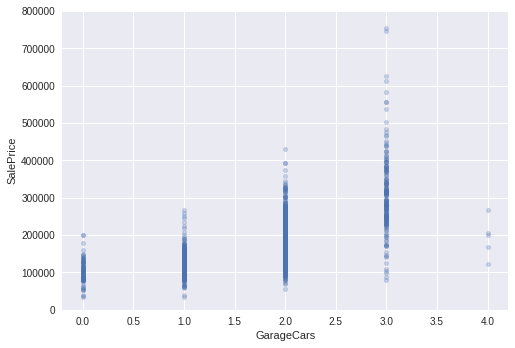

In [15]:
var = 'GarageCars' # most of records has value of 0
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), alpha=0.3);

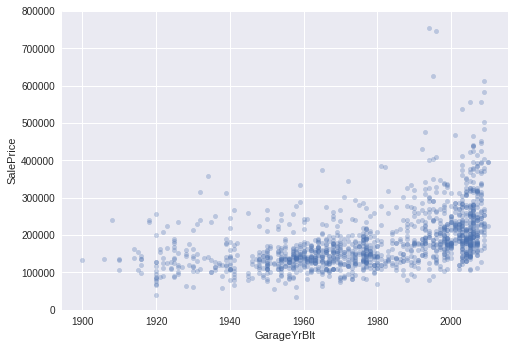

In [16]:
var = 'GarageYrBlt' # most of records has value of 0
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), alpha=0.3);

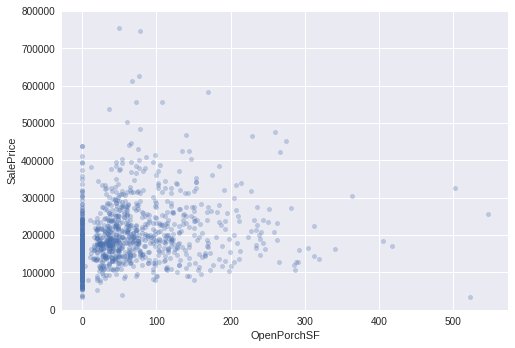

In [17]:
var = 'OpenPorchSF' # most of records has value of 0
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), alpha=0.3);

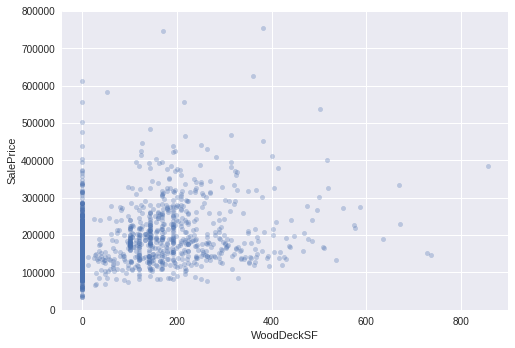

In [18]:
var = 'WoodDeckSF' # most of records has value of 0
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), alpha=0.3);

### We can see that the fllowing numerical features ['GrLivArea','OverallQual','YearBuilt','TotalBsmtSF','GarageArea','GarageYrBlt','GarageCars'] are all positive correlated to ['SalePrice']

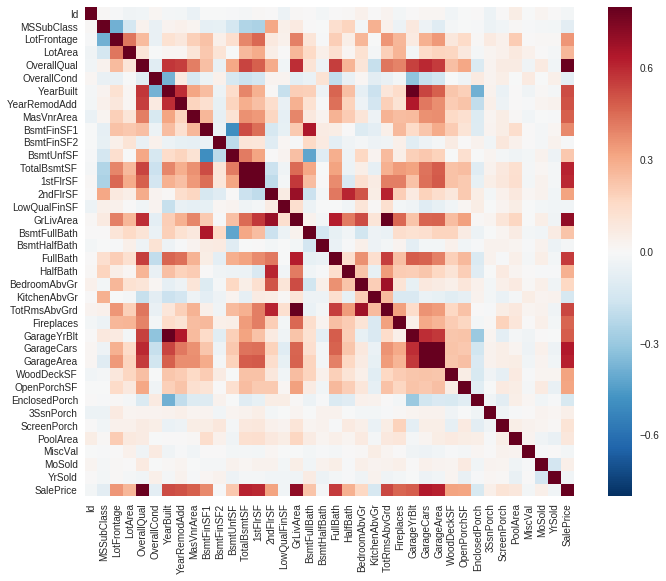

In [19]:
# correlation matrix
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

### We can see that the variables ['TotalBsmtSF','1stFlrSF','GarageCars','GarageArea']  showed in thse dark red/ maroon colored squares.
They are highly correlated show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate multicollinearity. By taking a second look at each of those pairs of ccorrelated variables we can definetly see that each of the variables pairs almost represent the same information.

### Also, by observing the correlations of ['SalePrice'] variable.
We can see that it is highly correlated with ['OverallQual','GrLivArea','TotalRmsAbvGrd','YearBuilt','YearRemodAdd'] besides the previously mentioned variable pairs.

Index([u'SalePrice', u'OverallQual', u'GrLivArea', u'GarageCars',
       u'GarageArea', u'TotalBsmtSF', u'1stFlrSF', u'FullBath',
       u'TotRmsAbvGrd', u'YearBuilt'],
      dtype='object')


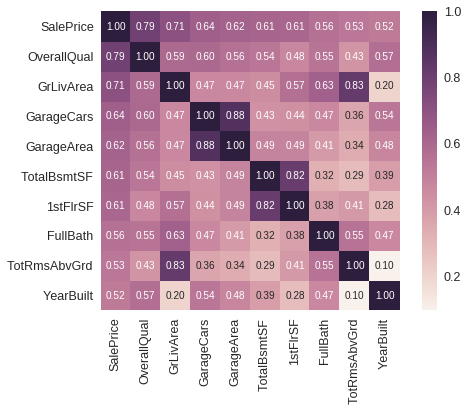

In [20]:
#saleprice correlation matrix
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index #RangeIndex(start=0, stop=1460, step=1)
print(cols)
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size':10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

### This peace of art graph is showing the Top 10 features mostly correlated with SalesPrice (according to their Correlation Coeffecient) and they are as follows in descending order:
    - OverallQual
    - GrLivArea
    - GarageCars
    - GarageArea
    - TotalBsmtSF 
    - 1stFlrSF
    - FullBath
    - TotRmsAbvGrd
    - YearBuilt
### Some Notes about SalesPrice Correlation Matrix:
    - GarageCars and GarageArea are one of the most correlated features, but they are so much correlated in themselves so its a ggod practice to just use only one of them, so we 'll take GarageCars as it is more corrleted with SalePrice. And it's the same case with TotalBsmtSF & 1stFlrSF and GrLivArea & TotRmsAbvGrd.
    - YearBuilt --> is slightly correlated with SalePrice ... which is slightly unreasonable!!!

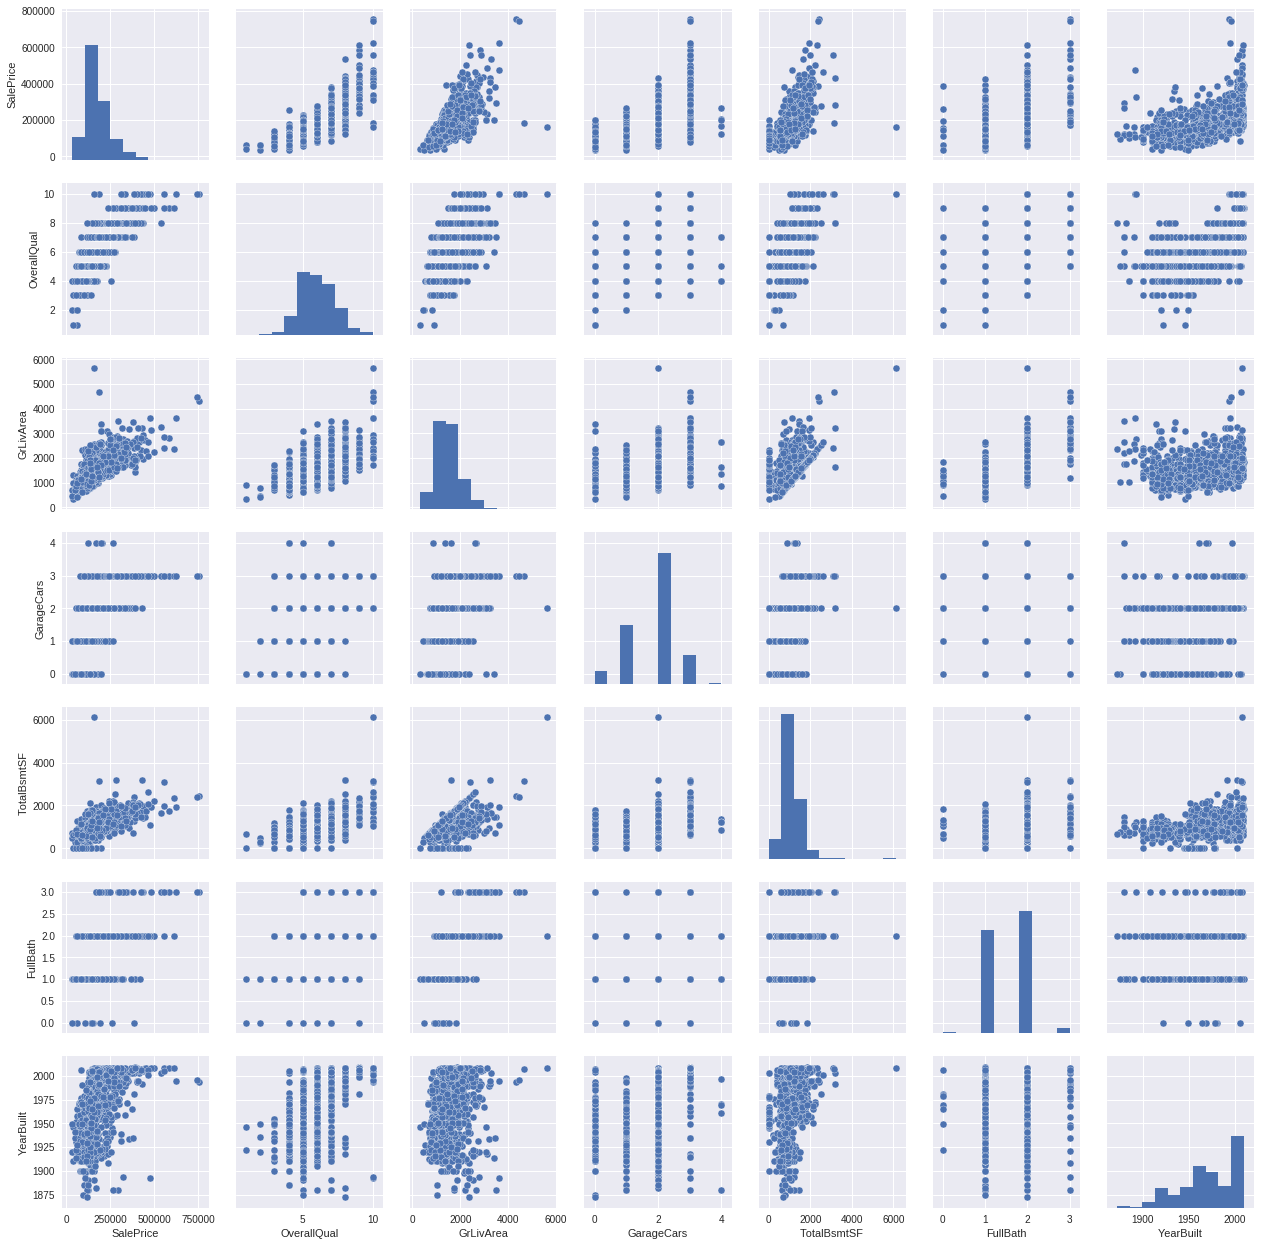

In [21]:
#scatterplot
sns.set() 
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
        'TotalBsmtSF','FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], size = 2.5)
plt.show();

In [22]:
corrmat.nlargest?

In [23]:
train_data['SalePrice'].index

RangeIndex(start=0, stop=1460, step=1)

In [24]:
#train_data.dropna(inplace=True)
#test_data.dropna(inplace=True)
x = train_data.iloc[:, :-1].values 
y = train_data.iloc[:, 80].values
x_test = test_data.iloc[:, :].values

In [25]:
"""
# take care of missing data,
# replace missing data by mean value
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy="mean",axis=0)
imputer = imputer.fit(x[:,1:3])
x[:, 1:3] = imputer.transform(x[:, 1:3]) #replaces missing by mean value of the column
"""


'\n# take care of missing data,\n# replace missing data by mean value\nfrom sklearn.preprocessing import Imputer\nimputer = Imputer(missing_values=\'NaN\', strategy="mean",axis=0)\nimputer = imputer.fit(x[:,1:3])\nx[:, 1:3] = imputer.transform(x[:, 1:3]) #replaces missing by mean value of the column\n'

### Encode the categorical features

In [26]:
# Encode categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
x[:,0] = labelencoder_x.fit_transform(x[:,0])

# Dummy Encoding
onehotencoder = OneHotEncoder(categorical_features=[0]) # encode the country col
x = onehotencoder.fit_transform(x).toarray()
# Encode the label/dependent variable yes:1 , no:0
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

ValueError: could not convert string to float: Normal

In [ ]:

# splitting data into training and test set
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8,  random_state= 0)

# Feature scaling using [standaralization = (x-mean(x)/ SD(x)) or Normalization = (x-min(x))/ max(x)-min(x)]
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
# we don't need to aplly feature scaiiling for the dependent variable for a binary classifier


### Dive more looking for data corellations

In [ ]:
y1 = y_train
y_train_tmp = []
for y in y1:
    SW = [np.inf, -np.inf, np.nan]
    if not all(np.isfinite(SW)):
        continue
    y_train_tmp.append(y)

In [ ]:
y_train_tmp

In [ ]:

x1 = [x_train["Neighborhood"]]
for y in y1:
    if y
y1 = [y for y in y_train if not np.isnan()]
print(len(y1))

In [ ]:
try:
    x1 = x_train["Neighborhood"]
    y1 = y_train
except ValueError:  #raised if `y` is empty.
    pass

df1 = pd.DataFrame(x1, y1)
try:
    cm1 = df1.corr()
except ValueError:
    pass
sns.heatmap(cm1, square = True)
plt.title('Feature Correlation Matrix of the Hyundai Admin Posts')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

In [ ]:
y1

In [ ]:
x_train
cm1 = admin_posts.corr()
sns.heatmap(cm1, square = True)
plt.title('Feature Correlation Matrix of the Hyundai Admin Posts')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

In [ ]:
# import statsmodels 
import statsmodels.api as sm 

X = x_train
y = y_train ## dependent variable
X = sm.add_constant(X) ## let's add an intercept (b0) to our model

model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

# Print out the statistics
model.summary()

I went through this process and concluded that the following variables can play an important role in this problem:

    - OverallQual (which is a variable that I don't like because I don't know how it was computed; a funny exercise would be to predict 'OverallQual' using all the other variables available).
    - YearBuilt.
    - TotalBsmtSF.
    - GrLivArea.

I ended up with two 'building' variables ('OverallQual' and 'YearBuilt') and two 'space' variables ('TotalBsmtSF' and 'GrLivArea'). This might be a little bit unexpected as it goes against the real estate mantra that all that matters is 'location, location and location'. It is possible that this quick data examination process was a bit harsh for categorical variables. For example, I expected the 'Neigborhood' variable to be more relevant, but after the data examination I ended up excluding it. Maybe this is related to the use of scatter plots instead of boxplots, which are more suitable for categorical variables visualization. The way we visualize data often influences our conclusions.